In [303]:
# GABRIEL DAVID CHANG PEREZ

# Import de librerias e inicialización del data frame (1. CARGAR DATOS)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

House_Prices_File = 'train.csv'

try:
    data_frame = pd.read_csv(House_Prices_File)
    print('Archivo CSV cargado al Data Frame exitosamente')

except Exception as ex:
    print('ERROR AL CARGAR EL DF --> ', ex)


Archivo CSV cargado al Data Frame exitosamente


In [267]:
# 2. EXPLORACION INICIAL

# Cantidad de registros:
print('CANTIDAD DE REGISTROS (FILAS) EN EL DATA SET --> ', data_frame.shape[0])

# Cantidad de columnas:
print('\nCANTIDAD DE COLUMNAS (VARIABLES) EN EL DATA SET --> ', data_frame.shape[1])

# Columnas y sus tipos:

# (configuracion de pandas para mostrar todas las filas y columnas en un print)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print('\nCOLUMNAS Y SUS TIPOS:\n')
print(data_frame.dtypes)

# CON APOYO DEL ARCHIVO DE TEXTO "DATA_DESCIPTION" QUE VENÍA EN EL CONJUNTO DE ARCHIVOS DESCARGADOS
# DESDE KAGGLE, PUDE CLASIFICAR LAS COLUMANS ENTRE NUMERICAS Y CATEGORICAS:
columnas_numericas = [
    "Id", "LotFrontage", "LotArea", "YearBuilt", "YearRemodAdd", "MasVnrArea",
    "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", 
    "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", 
    "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", 
    "Fireplaces", "GarageYrBlt", "GarageCars", "GarageArea", "WoodDeckSF", 
    "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", 
    "MiscVal", "MoSold", "YrSold", "SalePrice"
]

columnas_categoricas = [
    "MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour", 
    "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1", 
    "Condition2", "BldgType", "HouseStyle", "OverallQual", "OverallCond", 
    "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", 
    "ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtCond", 
    "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", 
    "CentralAir", "Electrical", "KitchenQual", "Functional", "FireplaceQu", 
    "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", 
    "PoolQC", "Fence", "MiscFeature", "SaleType", "SaleCondition"
]

print('\nCOLUMNAS NUMERICAS (', len(columnas_numericas), '):' )
print(columnas_numericas)

print('\nCOLUMNAS CATEGORICAS (', len(columnas_categoricas), '):' )
print(columnas_categoricas)

# (resetear configuración de mostrar la enteridad de info en un print)
#pd.reset_option('display.max_rows')
#pd.reset_option('display.max_columns')

CANTIDAD DE REGISTROS (FILAS) EN EL DATA SET -->  1460

CANTIDAD DE COLUMNAS (VARIABLES) EN EL DATA SET -->  81

COLUMNAS Y SUS TIPOS:

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1    

In [293]:
# 3. LIMPIEZA DE DATOS - Identificación Valores
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print('IMPRIMIENDO EL PORCENTAJE DE VALORES VACÍOS POR CADA COLUMNA:')

df_porcentajes_vacios = round(data_frame.isnull().mean() * 100, 2)

print(f'\n{df_porcentajes_vacios}')

columnas_con_nulos = df_porcentajes_vacios[df_porcentajes_vacios > 0].index.tolist()
print('\nCOLUMNAS CON VALORES VACIOS (', len(columnas_con_nulos), '):')
print(f'\n{columnas_con_nulos}')

columnas_nulos_menor_20 = df_porcentajes_vacios[(df_porcentajes_vacios < 20) & (df_porcentajes_vacios > 0)].index.tolist()
print('\nCOLUMNAS CON PORCENTAJES DE VALORES NULOS MENOR AL 20% (', len(columnas_nulos_menor_20), '):')
print(f'\n{columnas_nulos_menor_20}')

IMPRIMIENDO EL PORCENTAJE DE VALORES VACÍOS POR CADA COLUMNA:

Id                             0.00
MSSubClass                     0.00
MSZoning                       0.00
LotFrontage                    0.00
LotArea                        0.00
Street                         0.00
Alley                         93.77
LotShape                       0.00
LandContour                    0.00
Utilities                      0.00
LotConfig                      0.00
LandSlope                      0.00
Neighborhood                   0.00
Condition1                     0.00
Condition2                     0.00
BldgType                       0.00
HouseStyle                     0.00
OverallQual                    0.00
OverallCond                    0.00
YearBuilt                      0.00
YearRemodAdd                   0.00
RoofStyle                      0.00
RoofMatl                       0.00
Exterior1st                    0.00
Exterior2nd                    0.00
MasVnrType                    59.73
M

In [269]:
# 3. IMPUTACION 1 LOTFRONTAGE
print(f'Porcentaje Valores Nulos - LotFrontage - Pre Imputacion --> {round(data_frame['LotFrontage'].isnull().mean() * 100, 2)}')
print(f'Cantidad Valores Nulos - LotFrontage - Pre Imputacion --> {data_frame['LotFrontage'].isnull().sum()}')

# LotFrontage - en este caso, no hay valores atípicos demasiado alejados del resto
# pero aun asi utilizaremos median
LotFrontage_median = data_frame['LotFrontage'].median()
print(f'\nLotFrontage median --> {LotFrontage_median}')

# Crear copia del df original y en columna, rellenar valores vacios
data_frame_LotFrontage_median = data_frame['LotFrontage'].copy()
data_frame_LotFrontage_median.fillna(LotFrontage_median, inplace=True)

# Imprimir nueva suma/porcentaje de valores vacios
print(f'Porcentaje Valores Nulos - LotFrontage - Post Imputacion --> {data_frame_LotFrontage_median.isnull().mean()}')
print(f'Cantidad Valores Nulos - LotFrontage - Post Imputacion --> {data_frame_LotFrontage_median.isnull().sum()}')S

Porcentaje Valores Nulos - LotFrontage - Pre Imputacion --> 17.74
Cantidad Valores Nulos - LotFrontage - Pre Imputacion --> 259

LotFrontage median --> 69.0
Porcentaje Valores Nulos - LotFrontage - Post Imputacion --> 0.0
Cantidad Valores Nulos - LotFrontage - Post Imputacion --> 0


In [270]:
# 3. IMPUTACION 2 MasVnrArea
print(f'Porcentaje Valores Nulos - MasVnrArea - Pre Imputacion --> {round(data_frame['MasVnrArea'].isnull().mean() * 100, 2)}')
print(f'Cantidad Valores Nulos - MasVnrArea - Pre Imputacion --> {data_frame['MasVnrArea'].isnull().sum()}')

# MasVnrArea - en este caso, hay muchos valores 0 en el rango, posiblemente significando que
# muchas de las casas no tienen área de mampostería en sí

# Crear copia del df original y en columna, rellenar valores vacios
data_frame_MasVnrArea_fill = data_frame['MasVnrArea'].copy()
data_frame_MasVnrArea_fill.fillna(0, inplace=True)

# Imprimir nueva suma/porcentaje de valores vacios
print(f'\nPorcentaje Valores Nulos - MasVnrArea - Post Imputacion --> {data_frame_MasVnrArea_fill.isnull().mean()}')
print(f'Cantidad Valores Nulos - MasVnrArea - Post Imputacion --> {data_frame_MasVnrArea_fill.isnull().sum()}')


Porcentaje Valores Nulos - MasVnrArea - Pre Imputacion --> 0.55
Cantidad Valores Nulos - MasVnrArea - Pre Imputacion --> 8

Porcentaje Valores Nulos - MasVnrArea - Post Imputacion --> 0.0
Cantidad Valores Nulos - MasVnrArea - Post Imputacion --> 0


In [271]:
# 3. IMPUTACION 3 BsmtQual - Utilizamos Moda por ser categórico
print(f'Porcentaje Valores Nulos - BsmtQual - Pre Imputacion --> {round(data_frame['BsmtQual'].isnull().mean() * 100, 2)}')
print(f'Cantidad Valores Nulos - BsmtQual - Pre Imputacion --> {data_frame['BsmtQual'].isnull().sum()}')

# BsmtQual - utilizamos la moda (primer valor encontrado de los mas repetidos)
BsmtQual_mode = data_frame['BsmtQual'].mode()[0]
print(f'\nModa de BsmtQual --> {BsmtQual_mode}')

data_frame_BsmtQual_mode = data_frame['BsmtQual'].copy()
data_frame_BsmtQual_mode.fillna(BsmtQual_mode, inplace=True)

# Imprimir nueva suma/porcentaje de valores vacios
print(f'\nPorcentaje Valores Nulos - BsmtQual - Post Imputacion --> {data_frame_BsmtQual_mode.isnull().mean()}')
print(f'Cantidad Valores Nulos - BsmtQual - Post Imputacion --> {data_frame_BsmtQual_mode.isnull().sum()}')

Porcentaje Valores Nulos - BsmtQual - Pre Imputacion --> 2.53
Cantidad Valores Nulos - BsmtQual - Pre Imputacion --> 37

Moda de BsmtQual --> TA

Porcentaje Valores Nulos - BsmtQual - Post Imputacion --> 0.0
Cantidad Valores Nulos - BsmtQual - Post Imputacion --> 0


In [272]:
# 3. IMPUTACION 4 BsmtCond - Utilizamos Moda por ser categórico (casi no hay NAs)
print(f'Porcentaje Valores Nulos - BsmtCond - Pre Imputacion --> {round(data_frame['BsmtCond'].isnull().mean() * 100, 2)}')
print(f'Cantidad Valores Nulos - BsmtCond - Pre Imputacion --> {data_frame['BsmtCond'].isnull().sum()}')

# BsmtCond - utilizamos la moda (primer valor encontrado de los mas repetidos)
BsmtCond_mode = data_frame['BsmtCond'].mode()[0]
print(f'\nModa de BsmtCond --> {BsmtCond_mode}')

data_frame_BsmtCond_mode = data_frame['BsmtCond'].copy()
data_frame_BsmtCond_mode.fillna(BsmtCond_mode, inplace=True)

# Imprimir nueva suma/porcentaje de valores vacios
print(f'\nPorcentaje Valores Nulos - BsmtCond - Post Imputacion --> {data_frame_BsmtCond_mode.isnull().mean()}')
print(f'Cantidad Valores Nulos - BsmtCond - Post Imputacion --> {data_frame_BsmtCond_mode.isnull().sum()}')

Porcentaje Valores Nulos - BsmtCond - Pre Imputacion --> 2.53
Cantidad Valores Nulos - BsmtCond - Pre Imputacion --> 37

Moda de BsmtCond --> TA

Porcentaje Valores Nulos - BsmtCond - Post Imputacion --> 0.0
Cantidad Valores Nulos - BsmtCond - Post Imputacion --> 0


In [273]:
# 3. IMPUTACION 5 BsmtExposure - Utilizamos Moda por ser categórico
print(f'Porcentaje Valores Nulos - BsmtExposure - Pre Imputacion --> {round(data_frame['BsmtExposure'].isnull().mean() * 100, 2)}')
print(f'Cantidad Valores Nulos - BsmtExposure - Pre Imputacion --> {data_frame['BsmtExposure'].isnull().sum()}')

# BsmtExposure - utilizamos la moda (primer valor encontrado de los mas repetidos)
BsmtExposure_mode = data_frame['BsmtExposure'].mode()[0]
print(f'\nModa de BsmtExposure --> {BsmtExposure_mode}')

data_frame_BsmtExposure_mode = data_frame['BsmtExposure'].copy()
data_frame_BsmtExposure_mode.fillna(BsmtExposure_mode, inplace=True)

# Imprimir nueva suma/porcentaje de valores vacios
print(f'\nPorcentaje Valores Nulos - BsmtExposure - Post Imputacion --> {data_frame_BsmtExposure_mode.isnull().mean()}')
print(f'Cantidad Valores Nulos - BsmtExposure - Post Imputacion --> {data_frame_BsmtExposure_mode.isnull().sum()}')

Porcentaje Valores Nulos - BsmtExposure - Pre Imputacion --> 2.6
Cantidad Valores Nulos - BsmtExposure - Pre Imputacion --> 38

Moda de BsmtExposure --> No

Porcentaje Valores Nulos - BsmtExposure - Post Imputacion --> 0.0
Cantidad Valores Nulos - BsmtExposure - Post Imputacion --> 0


In [274]:
# 3. IMPUTACION 6 BsmtFinType1 - Utilizamos Moda por ser categórico
print(f'Porcentaje Valores Nulos - BsmtFinType1 - Pre Imputacion --> {round(data_frame['BsmtFinType1'].isnull().mean() * 100, 2)}')
print(f'Cantidad Valores Nulos - BsmtFinType1 - Pre Imputacion --> {data_frame['BsmtFinType1'].isnull().sum()}')

# BsmtFinType1 - utilizamos la moda (primer valor encontrado de los mas repetidos)
BsmtFinType1_mode = data_frame['BsmtFinType1'].mode()[0]
print(f'\nModa de BsmtFinType1 --> {BsmtFinType1_mode}')

data_frame_BsmtFinType1_mode = data_frame['BsmtFinType1'].copy()
data_frame_BsmtFinType1_mode.fillna(BsmtFinType1_mode, inplace=True)

# Imprimir nueva suma/porcentaje de valores vacios
print(f'\nPorcentaje Valores Nulos - BsmtFinType1 - Post Imputacion --> {data_frame_BsmtFinType1_mode.isnull().mean()}')
print(f'Cantidad Valores Nulos - BsmtFinType1 - Post Imputacion --> {data_frame_BsmtFinType1_mode.isnull().sum()}')

Porcentaje Valores Nulos - BsmtFinType1 - Pre Imputacion --> 2.53
Cantidad Valores Nulos - BsmtFinType1 - Pre Imputacion --> 37

Moda de BsmtFinType1 --> Unf

Porcentaje Valores Nulos - BsmtFinType1 - Post Imputacion --> 0.0
Cantidad Valores Nulos - BsmtFinType1 - Post Imputacion --> 0


In [275]:
# 3. IMPUTACION 7 BsmtFinType2 - Utilizamos Moda por ser categórico
print(f'Porcentaje Valores Nulos - BsmtFinType2 - Pre Imputacion --> {round(data_frame['BsmtFinType2'].isnull().mean() * 100, 2)}')
print(f'Cantidad Valores Nulos - BsmtFinType2 - Pre Imputacion --> {data_frame['BsmtFinType2'].isnull().sum()}')

# BsmtFinType2 - utilizamos la moda (primer valor encontrado de los mas repetidos)
BsmtFinType2_mode = data_frame['BsmtFinType2'].mode()[0]
print(f'\nModa de BsmtFinType2 --> {BsmtFinType2_mode}')

data_frame_BsmtFinType2_mode = data_frame['BsmtFinType2'].copy()
data_frame_BsmtFinType2_mode.fillna(BsmtFinType2_mode, inplace=True)

# Imprimir nueva suma/porcentaje de valores vacios
print(f'\nPorcentaje Valores Nulos - BsmtFinType2 - Post Imputacion --> {data_frame_BsmtFinType2_mode.isnull().mean()}')
print(f'Cantidad Valores Nulos - BsmtFinType2 - Post Imputacion --> {data_frame_BsmtFinType2_mode.isnull().sum()}')

Porcentaje Valores Nulos - BsmtFinType2 - Pre Imputacion --> 2.6
Cantidad Valores Nulos - BsmtFinType2 - Pre Imputacion --> 38

Moda de BsmtFinType2 --> Unf

Porcentaje Valores Nulos - BsmtFinType2 - Post Imputacion --> 0.0
Cantidad Valores Nulos - BsmtFinType2 - Post Imputacion --> 0


In [276]:
# 3. IMPUTACION 8 Electrical - Utilizamos Moda por ser categórico
print(f'Porcentaje Valores Nulos - Electrical - Pre Imputacion --> {round(data_frame['Electrical'].isnull().mean() * 100, 2)}')
print(f'Cantidad Valores Nulos - Electrical - Pre Imputacion --> {data_frame['Electrical'].isnull().sum()}')

# Electrical - utilizamos la moda (primer valor encontrado de los mas repetidos)
Electrical_mode = data_frame['Electrical'].mode()[0]
print(f'\nModa de Electrical --> {Electrical_mode}')

data_frame_Electrical_mode = data_frame['Electrical'].copy()
data_frame_Electrical_mode.fillna(Electrical_mode, inplace=True)

# Imprimir nueva suma/porcentaje de valores vacios
print(f'\nPorcentaje Valores Nulos - Electrical - Post Imputacion --> {data_frame_Electrical_mode.isnull().mean()}')
print(f'Cantidad Valores Nulos - Electrical - Post Imputacion --> {data_frame_Electrical_mode.isnull().sum()}')

Porcentaje Valores Nulos - Electrical - Pre Imputacion --> 0.07
Cantidad Valores Nulos - Electrical - Pre Imputacion --> 1

Moda de Electrical --> SBrkr

Porcentaje Valores Nulos - Electrical - Post Imputacion --> 0.0
Cantidad Valores Nulos - Electrical - Post Imputacion --> 0


In [277]:
# 3. IMPUTACION 9 GarageType - Utilizamos Moda por ser categórico
print(f'Porcentaje Valores Nulos - GarageType - Pre Imputacion --> {round(data_frame['GarageType'].isnull().mean() * 100, 2)}')
print(f'Cantidad Valores Nulos - GarageType - Pre Imputacion --> {data_frame['GarageType'].isnull().sum()}')

# GarageType - utilizamos la moda (primer valor encontrado de los mas repetidos)
GarageType_mode = data_frame['GarageType'].mode()[0]
print(f'\nModa de GarageType --> {GarageType_mode}')

data_frame_GarageType_mode = data_frame['GarageType'].copy()
data_frame_GarageType_mode.fillna(GarageType_mode, inplace=True)

# Imprimir nueva suma/porcentaje de valores vacios
print(f'\nPorcentaje Valores Nulos - GarageType - Post Imputacion --> {data_frame_GarageType_mode.isnull().mean()}')
print(f'Cantidad Valores Nulos - GarageType - Post Imputacion --> {data_frame_GarageType_mode.isnull().sum()}')

Porcentaje Valores Nulos - GarageType - Pre Imputacion --> 5.55
Cantidad Valores Nulos - GarageType - Pre Imputacion --> 81

Moda de GarageType --> Attchd

Porcentaje Valores Nulos - GarageType - Post Imputacion --> 0.0
Cantidad Valores Nulos - GarageType - Post Imputacion --> 0


In [278]:
# 3. IMPUTACION 10 GarageYrBlt - Utilizamos la mediana según lógica de año
print(f'Porcentaje Valores Nulos - GarageYrBlt - Pre Imputacion --> {round(data_frame['GarageYrBlt'].isnull().mean() * 100, 2)}')
print(f'Cantidad Valores Nulos - GarageYrBlt - Pre Imputacion --> {data_frame['GarageYrBlt'].isnull().sum()}')

# GarageYrBlt - utilizamos la mediana por no ser afectada por valores muy aislados
# y pierde un poco el sentido hacer un promedio de años
GarageYrBlt_median = data_frame['GarageYrBlt'].median()
print(f'\nMediana de GarageBltYear --> {GarageYrBlt_median}')

data_frame_GarageYrBlt_median = data_frame['GarageYrBlt'].copy()
data_frame_GarageYrBlt_median.fillna(GarageYrBlt_median, inplace=True)

# Imprimir nueva suma/porcentaje de valores vacios
print(f'\nPorcentaje Valores Nulos - GarageYrBlt - Post Imputacion --> {data_frame_GarageYrBlt_median.isnull().mean()}')
print(f'Cantidad Valores Nulos - GarageYrBlt - Post Imputacion --> {data_frame_GarageYrBlt_median.isnull().sum()}')

Porcentaje Valores Nulos - GarageYrBlt - Pre Imputacion --> 5.55
Cantidad Valores Nulos - GarageYrBlt - Pre Imputacion --> 81

Mediana de GarageBltYear --> 1980.0

Porcentaje Valores Nulos - GarageYrBlt - Post Imputacion --> 0.0
Cantidad Valores Nulos - GarageYrBlt - Post Imputacion --> 0


In [279]:
# 3. IMPUTACION 11 GarageFinish - Utilizamos Moda por ser categórico
print(f'Porcentaje Valores Nulos - GarageFinish - Pre Imputacion --> {round(data_frame['GarageFinish'].isnull().mean() * 100, 2)}')
print(f'Cantidad Valores Nulos - GarageFinish - Pre Imputacion --> {data_frame['GarageFinish'].isnull().sum()}')

# GarageFinish - utilizamos la moda (primer valor encontrado de los mas repetidos)
GarageFinish_mode = data_frame['GarageFinish'].mode()[0]
print(f'\nModa de GarageFinish --> {GarageFinish_mode}')

data_frame_GarageFinish_mode = data_frame['GarageType'].copy()
data_frame_GarageFinish_mode.fillna(GarageFinish_mode, inplace=True)

# Imprimir nueva suma/porcentaje de valores vacios
print(f'\nPorcentaje Valores Nulos - GarageFinish - Post Imputacion --> {data_frame_GarageFinish_mode.isnull().mean()}')
print(f'Cantidad Valores Nulos - GarageFinish - Post Imputacion --> {data_frame_GarageFinish_mode.isnull().sum()}')

Porcentaje Valores Nulos - GarageFinish - Pre Imputacion --> 5.55
Cantidad Valores Nulos - GarageFinish - Pre Imputacion --> 81

Moda de GarageFinish --> Unf

Porcentaje Valores Nulos - GarageFinish - Post Imputacion --> 0.0
Cantidad Valores Nulos - GarageFinish - Post Imputacion --> 0


In [280]:
# 3. IMPUTACION 12 GarageQual - Utilizamos Moda por ser categórico
print(f'Porcentaje Valores Nulos - GarageQual - Pre Imputacion --> {round(data_frame['GarageQual'].isnull().mean() * 100, 2)}')
print(f'Cantidad Valores Nulos - GarageQual - Pre Imputacion --> {data_frame['GarageQual'].isnull().sum()}')

# GarageQual - utilizamos la moda (primer valor encontrado de los mas repetidos)
GarageQual_mode = data_frame['GarageQual'].mode()[0]
print(f'\nModa de GarageQual --> {GarageQual_mode}')

data_frame_GarageQual_mode = data_frame['GarageQual'].copy()
data_frame_GarageQual_mode.fillna(GarageQual_mode, inplace=True)

# Imprimir nueva suma/porcentaje de valores vacios
print(f'\nPorcentaje Valores Nulos - GarageQual - Post Imputacion --> {data_frame_GarageQual_mode.isnull().mean()}')
print(f'Cantidad Valores Nulos - GarageQual - Post Imputacion --> {data_frame_GarageQual_mode.isnull().sum()}')

Porcentaje Valores Nulos - GarageQual - Pre Imputacion --> 5.55
Cantidad Valores Nulos - GarageQual - Pre Imputacion --> 81

Moda de GarageQual --> TA

Porcentaje Valores Nulos - GarageQual - Post Imputacion --> 0.0
Cantidad Valores Nulos - GarageQual - Post Imputacion --> 0


In [281]:
# 3. IMPUTACION 13 GarageCond - Utilizamos Moda por ser categórico
print(f'Porcentaje Valores Nulos - GarageCond - Pre Imputacion --> {round(data_frame['GarageCond'].isnull().mean() * 100, 2)}')
print(f'Cantidad Valores Nulos - GarageCond - Pre Imputacion --> {data_frame['GarageCond'].isnull().sum()}')

# GarageCond - utilizamos la moda (primer valor encontrado de los mas repetidos)
GarageCond_mode = data_frame['GarageCond'].mode()[0]
print(f'\nModa de GarageCond --> {GarageCond_mode}')

data_frame_GarageCond_mode = data_frame['GarageCond'].copy()
data_frame_GarageCond_mode.fillna(GarageCond_mode, inplace=True)

# Imprimir nueva suma/porcentaje de valores vacios
print(f'\nPorcentaje Valores Nulos - GarageCond - Post Imputacion --> {data_frame_GarageCond_mode.isnull().mean()}')
print(f'Cantidad Valores Nulos - GarageCond - Post Imputacion --> {data_frame_GarageCond_mode.isnull().sum()}')

Porcentaje Valores Nulos - GarageCond - Pre Imputacion --> 5.55
Cantidad Valores Nulos - GarageCond - Pre Imputacion --> 81

Moda de GarageCond --> TA

Porcentaje Valores Nulos - GarageCond - Post Imputacion --> 0.0
Cantidad Valores Nulos - GarageCond - Post Imputacion --> 0


In [304]:
#3. IMPUTACIÓN - REEMPLAZANDO VALORES DE COLUMNAS EN DF ORIGINAL CON LOS SUB-DFS CREADOS PARA VARIABLES LIMPIADAS

data_frame['LotFrontage'] = data_frame_LotFrontage_median
data_frame['MasVnrArea'] = data_frame_MasVnrArea_fill
data_frame['BsmtQual'] = data_frame_BsmtQual_mode
data_frame['BsmtCond'] = data_frame_BsmtCond_mode
data_frame['BsmtExposure'] = data_frame_BsmtExposure_mode
data_frame['BsmtFinType1'] = data_frame_BsmtFinType1_mode
data_frame['BsmtFinType2'] = data_frame_BsmtFinType2_mode
data_frame['Electrical'] = data_frame_Electrical_mode
data_frame['GarageType'] = data_frame_GarageType_mode
data_frame['GarageYrBlt'] = data_frame_GarageYrBlt_median
data_frame['GarageFinish'] = data_frame_GarageFinish_mode
data_frame['GarageQual'] = data_frame_GarageQual_mode
data_frame['GarageCond'] = data_frame_GarageCond_mode

print('Porcentajes Nuevos de Valores Vacíos después de Imputación - DataFrame original:\n')
print(f'{round(data_frame[
                            [
                            'LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
                            'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
                            'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'
                            ]
]
    .isnull()
    .mean()
    * 100 , 2
    )}'
)

Porcentajes Nuevos de Valores Vacíos después de Imputación - DataFrame original:

LotFrontage     0.0
MasVnrArea      0.0
BsmtQual        0.0
BsmtCond        0.0
BsmtExposure    0.0
BsmtFinType1    0.0
BsmtFinType2    0.0
Electrical      0.0
GarageType      0.0
GarageYrBlt     0.0
GarageFinish    0.0
GarageQual      0.0
GarageCond      0.0
dtype: float64


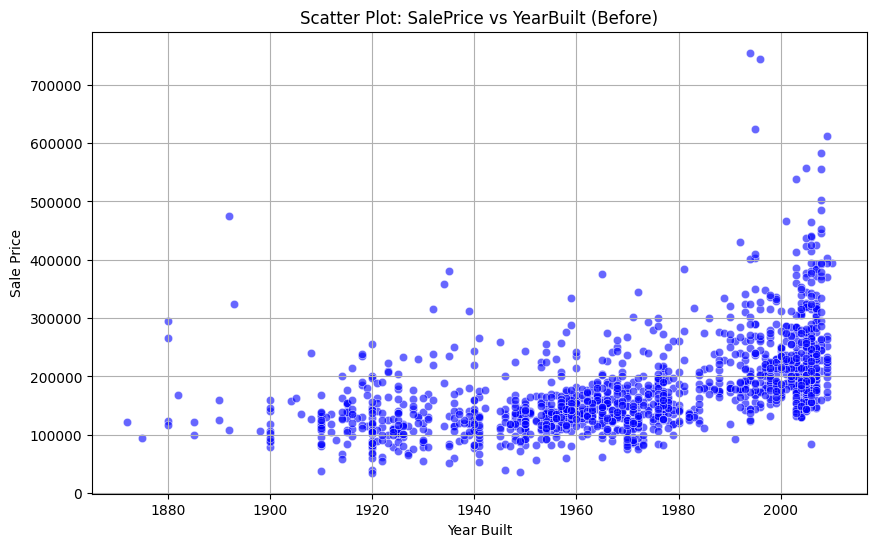

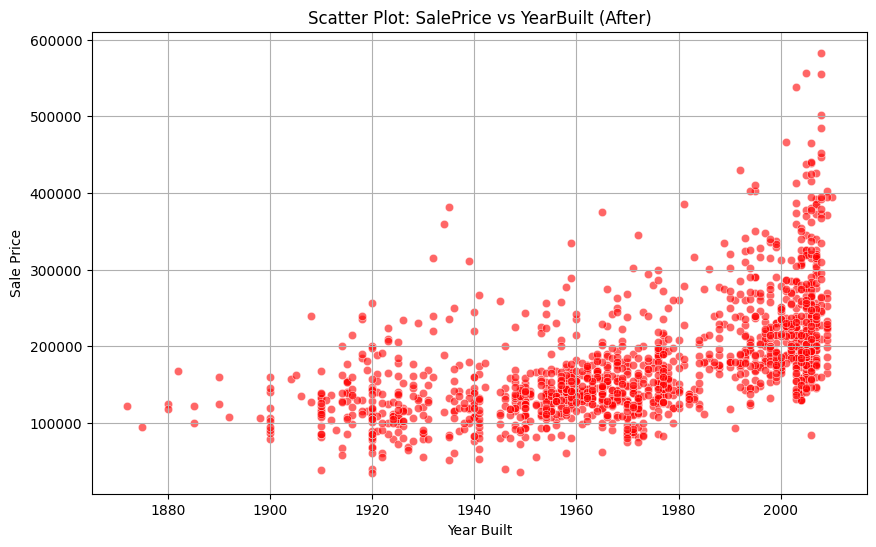

In [301]:
# 4 - OUTLIERS PT.1 - Scatter Plot de SalesPrice contra el Año de Construcción
import numpy as np

# configuracion del scatter plot (datos originales)
plt.figure(figsize=(10, 6))
sea.scatterplot(x=data_frame['YearBuilt'], y=data_frame['SalePrice'], color='b', alpha=0.6)
plt.title('Scatter Plot: SalePrice vs YearBuilt (Before)')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

# eliminación de los outliers identificados con mayor presencia/impacto:
# Reemplazar SalePrice por NaN para los casos antes del año 1900 y precio por encima de 200k
data_frame.loc[(data_frame['YearBuilt'] < 1900) & (data_frame['SalePrice'] > 200000), 'SalePrice'] = np.nan

# Reemplazar SalePrice por NaN para los casos después del año 1990 y precio por encima de 600k
data_frame.loc[(data_frame['YearBuilt'] > 1990) & (data_frame['SalePrice'] > 600000), 'SalePrice'] = np.nan


# configuracion del scatter plot (datos nuevos, removiendo los outliers)
plt.figure(figsize=(10, 6))
sea.scatterplot(x=data_frame['YearBuilt'], y=data_frame['SalePrice'], color='r', alpha=0.6)
plt.title('Scatter Plot: SalePrice vs YearBuilt (After)')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

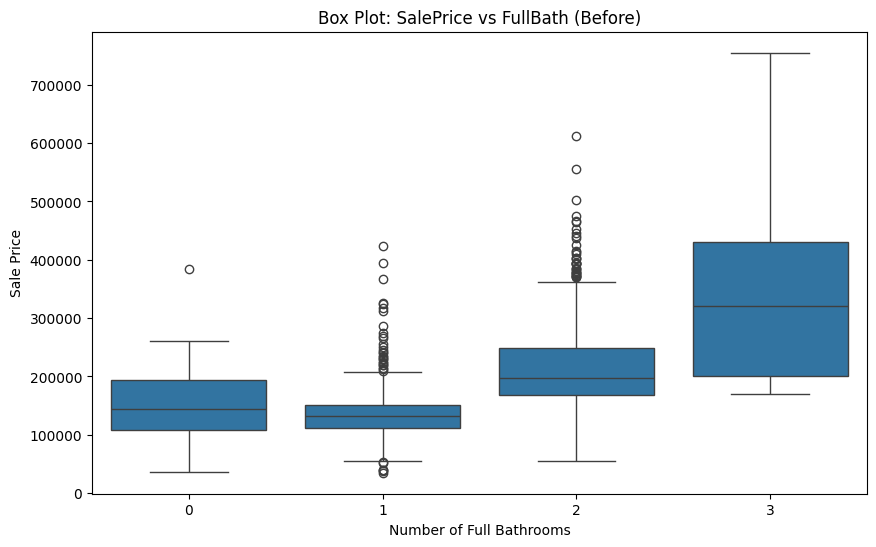

C:\Users\Yamila Karim Conrado\AppData\Local\Temp\ipykernel_11424\1851824891.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sea.boxplot(x=data_frame['FullBath'], y=data_frame['SalePrice'], palette="Set3")


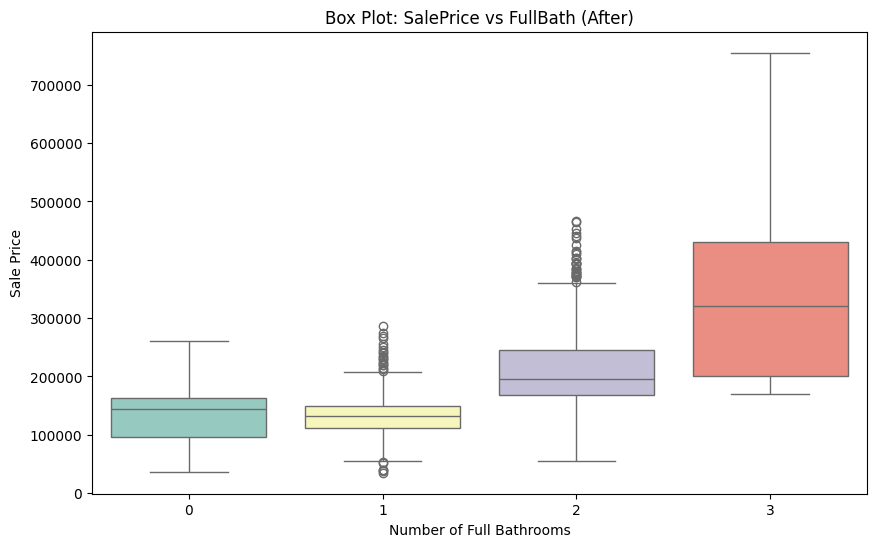

In [305]:
# 4 - OUTLIERS PT.2 - BOX PLOT DE SALEPRICE VS FULL BATH AMOUNT

plt.figure(figsize=(10, 6))
sea.boxplot(x=data_frame['FullBath'], y=data_frame['SalePrice'])
plt.title('Box Plot: SalePrice vs FullBath (Before)')
plt.xlabel('Number of Full Bathrooms')
plt.ylabel('Sale Price')
plt.show()

# Reemplazar por NaN los outliers con 0 baños completos y SalePrice mayor a 300k
data_frame.loc[(data_frame['FullBath'] == 0) & (data_frame['SalePrice'] > 300000), 'SalePrice'] = np.nan

# Reemplazar por NaN los outliers con 1 baño completo y SalePrice mayor a 300k
data_frame.loc[(data_frame['FullBath'] == 1) & (data_frame['SalePrice'] > 300000), 'SalePrice'] = np.nan

# Reemplazar por NaN los outliers con 2 baños completos y SalePrice mayor a 470k
data_frame.loc[(data_frame['FullBath'] == 2) & (data_frame['SalePrice'] > 470000), 'SalePrice'] = np.nan

plt.figure(figsize=(10, 6))
sea.boxplot(x=data_frame['FullBath'], y=data_frame['SalePrice'], palette="Set3")
plt.title('Box Plot: SalePrice vs FullBath (After)')
plt.xlabel('Number of Full Bathrooms')
plt.ylabel('Sale Price')
plt.show()


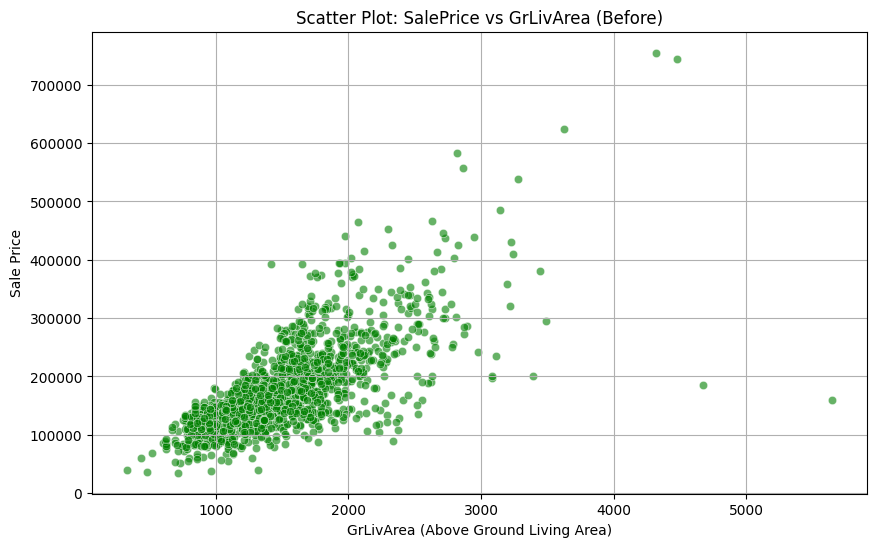

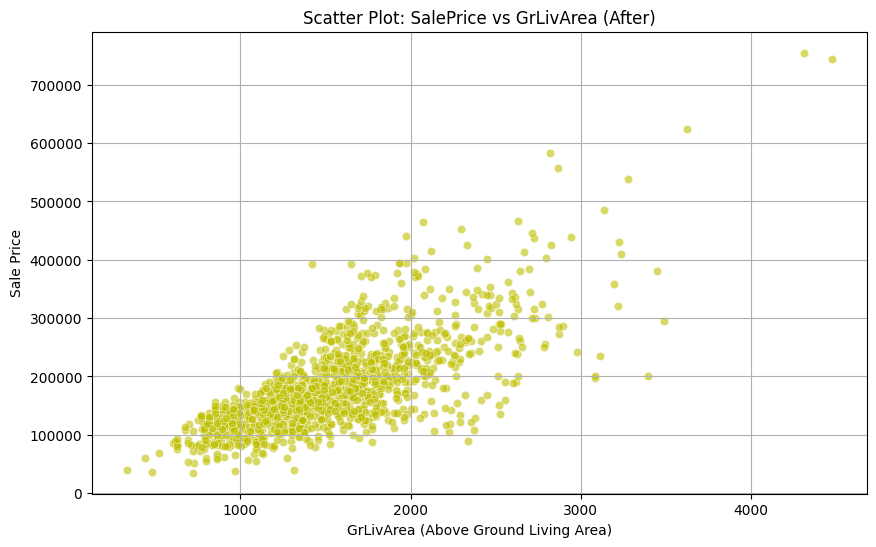

In [306]:
# 4 - OUTLIERS PT.3 - SCATTER PLOT DE SALEPRICE VS GRLIVAREA

# configuracion inicial del grafico (before outlier removal)
plt.figure(figsize=(10, 6))
sea.scatterplot(x=data_frame['GrLivArea'], y=data_frame['SalePrice'], color='g', alpha=0.6)
plt.title('Scatter Plot: SalePrice vs GrLivArea (Before)')
plt.xlabel('GrLivArea (Above Ground Living Area)')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()

# Reemplazar por NaN los outliers donde SalePrice es menor a 200k y GrLivArea es mayor a 4000
data_frame.loc[(data_frame['SalePrice'] < 200000) & (data_frame['GrLivArea'] > 4000), ['SalePrice', 'GrLivArea']] = np.nan

# grafico post-removal de outliers
plt.figure(figsize=(10, 6))
sea.scatterplot(x=data_frame['GrLivArea'], y=data_frame['SalePrice'], color='y', alpha=0.6)
plt.title('Scatter Plot: SalePrice vs GrLivArea (After)')
plt.xlabel('GrLivArea (Above Ground Living Area)')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()


In [307]:
# 5 - PT.1 - Normalización y Estandarización de los datos
# Saleprice, GrLivArea, y LotArea

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

# calculamos la estandarización (Z-score) para las variables: SaleProce, GrLvArea, y LotArea
data_frame['SalePrice_scaled'] = scaler.fit_transform(data_frame[['SalePrice']])
data_frame['GrLivArea_scaled'] = scaler.fit_transform(data_frame[['GrLivArea']])
data_frame['LotArea_scaled'] = scaler.fit_transform(data_frame[['LotArea']])

# calculamos la normalización (Min-Max scaling) para las variables: SaleProce, GrLvArea, y LotArea
data_frame['SalePrice_normalized'] = min_max_scaler.fit_transform(data_frame[['SalePrice']])
data_frame['GrLivArea_normalized'] = min_max_scaler.fit_transform(data_frame[['GrLivArea']])
data_frame['LotArea_normalized'] = min_max_scaler.fit_transform(data_frame[['LotArea']])

# Imprimir las primeras filas de SalePrice con sus versiones scaled y normalized
print('IMPRIMIENDO DATA_FRAME HEAD --> SALEPRICE + Z-SCORE + MIN-MAX SCACLING:\n')
print(data_frame[['SalePrice', 'SalePrice_scaled', 'SalePrice_normalized']].head())

# Imprimir las primeras filas de GrLivArea con sus versiones scaled y normalized
print('\nIMPRIMIENDO DATA_FRAME HEAD --> GrLivArea + Z-SCORE + MIN-MAX SCACLING:\n')
print(data_frame[['GrLivArea', 'GrLivArea_scaled', 'GrLivArea_normalized']].head())

# Imprimir las primeras filas de LotArea con sus versiones scaled y normalized
print('\nIMPRIMIENDO DATA_FRAME HEAD --> LotArea + Z-SCORE + MIN-MAX SCACLING:\n')
print(data_frame[['LotArea', 'LotArea_scaled', 'LotArea_normalized']].head())

IMPRIMIENDO DATA_FRAME HEAD --> SALEPRICE + Z-SCORE + MIN-MAX SCACLING:

   SalePrice  SalePrice_scaled  SalePrice_normalized
0   208500.0          0.386592              0.241078
1   181500.0          0.032967              0.203583
2   223500.0          0.583051              0.261908
3   140000.0         -0.510568              0.145952
4   250000.0          0.930127              0.298709

IMPRIMIENDO DATA_FRAME HEAD --> GrLivArea + Z-SCORE + MIN-MAX SCACLING:

   GrLivArea  GrLivArea_scaled  GrLivArea_normalized
0     1710.0          0.393013              0.332207
1     1262.0         -0.489391              0.224046
2     1786.0          0.542706              0.350555
3     1717.0          0.406800              0.333897
4     2198.0          1.354202              0.450024

IMPRIMIENDO DATA_FRAME HEAD --> LotArea + Z-SCORE + MIN-MAX SCACLING:

   LotArea  LotArea_scaled  LotArea_normalized
0     8450       -0.207142            0.033420
1     9600       -0.091886            0.038795
2   

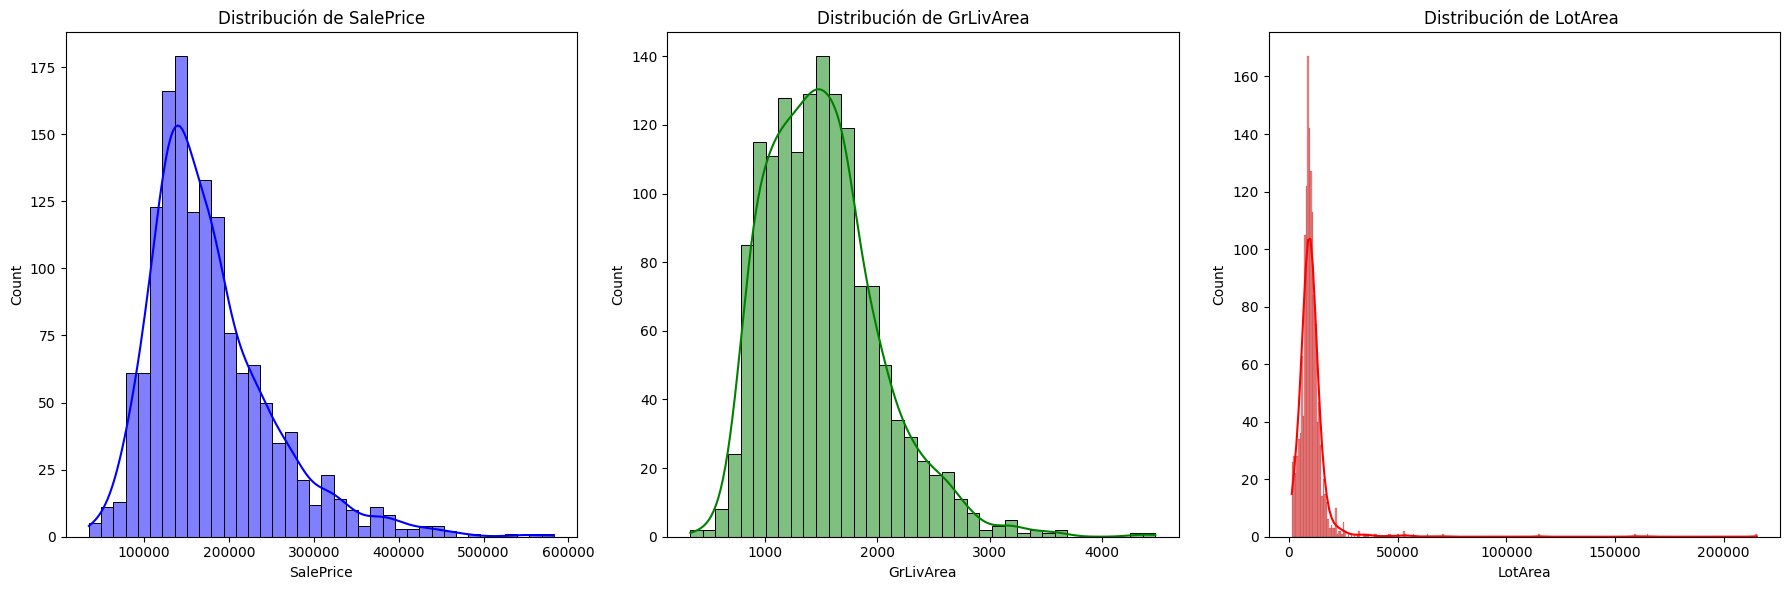

In [289]:
# 5 - PT.2 - EVALUACIÓN DE LAS DISTRIBUCIONES Y NATURALEZA DEL SESGO MEDIANTE HISTOGRAMAS
from scipy.stats import skew

# primero identificamos el tipo de sesgo que tienen esas tres variables
# Crear histogramas y gráficos de densidad
plt.figure(figsize=(18, 6))

# SalePrice
plt.subplot(1, 3, 1)
sea.histplot(data_frame['SalePrice'], kde=True, color='b')
plt.title(f'Distribución de SalePrice')

# GrLivArea
plt.subplot(1, 3, 2)
sea.histplot(data_frame['GrLivArea'], kde=True, color='g')
plt.title(f'Distribución de GrLivArea')

# LotArea
plt.subplot(1, 3, 3)
sea.histplot(data_frame['LotArea'], kde=True, color='r')
plt.title(f'Distribución de LotArea ')

plt.tight_layout()
plt.show()

# se puede observar como a pesar de que las tres variables tienen una distribución con sesgo positivo
# (mayor agrupación de valores en el rango bajo, o en la izquierda), la distrubición de LotArea
# es mucho mas notable, en el sentido que tiene un Sesgo Positivo mucho mas fuerte que SalePrice y GrLivArea

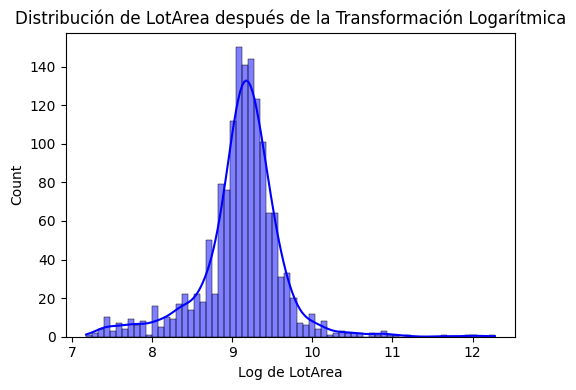

In [308]:
# 5 - PT.3 - TRANSFORMACIÓN LOGARÍTIMICA

# Aplicar la transformación logarítmica a LotArea
data_frame['LotArea_log_transformation'] = np.log1p(data_frame['LotArea'])

# Comparar la distribución antes y después de la transformación
plt.figure(figsize=(10, 4))

# Distribución después de la transformación logarítmica
plt.subplot(1, 2, 2)
sea.histplot(data_frame['LotArea_log_transformation'], kde=True, color='b')
plt.title(f'Distribución de LotArea después de la Transformación Logarítmica')
plt.xlabel('Log de LotArea')

plt.tight_layout()
plt.show()

In [310]:
# 6 - PT.1 - Ingeniería de Características - Columna Nueva 1 - "TotalLivArea"
from sklearn.preprocessing import LabelEncoder

# Crear la nueva variable TotalLivArea (suma de GrLivArea y TotalBsmtSF)
data_frame['TotalLivArea'] = data_frame['GrLivArea'] + data_frame['TotalBsmtSF']

# Crear los cuartiles con las etiquetas deseadas
total_livarea_cut = pd.qcut(data_frame['TotalLivArea'], q=4, labels=['Tiny', 'Compact', 'Spacious', 'Grand'])

# Aplicar esas categorías al DataFrame
data_frame['TotalLivArea_category'] = total_livarea_cut

# Crear un diccionario para mapear las categorías manualmente
category_mapping = {
                    'Tiny': 0,
                    'Compact': 1,
                    'Spacious': 2,
                    'Grand': 3
}

# Reemplazar las categorías por su encoding manual
data_frame['TotalLivArea_encoded'] = data_frame['TotalLivArea_category'].map(category_mapping)

print(data_frame[['TotalLivArea', 'TotalLivArea_category', 'TotalLivArea_encoded']].sample(8))


      TotalLivArea TotalLivArea_category TotalLivArea_encoded
603         1800.0                  Tiny                    0
863         2296.0               Compact                    1
1152        2884.0              Spacious                    2
1376        1558.0                  Tiny                    0
633         2112.0               Compact                    1
454         3456.0                 Grand                    3
585         3896.0                 Grand                    3
747         3880.0                 Grand                    3


In [313]:
# 6 rear la columna 'Contains_Empty_Values' con el conteo de valores nulos en cada fila
data_frame['Contains_Empty_Values'] = data_frame.isnull().sum(axis=1)

# Asignar etiquetas basadas en el número de valores nulos usando pd.cut directamente
# Few: 1-2 valores nulos, Several: 3-5 valores nulos, Many: 6 o más valores nulos
labels = ['Few', 'Several', 'Many']
data_frame['Empty_Values_Label'] = pd.cut(
    data_frame['Contains_Empty_Values'], bins=[-1, 2, 5, float('inf')], labels=labels)

# Mostrar una muestra para verificar el resultado
print(data_frame[['Contains_Empty_Values', 'Empty_Values_Label']].sample(10))


      Contains_Empty_Values Empty_Values_Label
1338                      6               Many
824                       5            Several
156                       6               Many
1414                      4            Several
338                       5            Several
915                       5            Several
1293                      4            Several
775                       5            Several
1144                      5            Several
123                       6               Many
